In [22]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [23]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/NKG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [24]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [25]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [26]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[16.8425177  16.83821208 16.83390647 16.82960085 16.82529524 16.82098962
 16.81668401 16.8123784  16.80807278 16.80376717 16.79946155 16.79515594
 16.79085032 16.78654471 16.7822391  16.77793348 16.77362787 16.76932225
 16.76501664 16.76071102 16.75640541 16.75209979 16.74779418 16.74348857
 16.73918295 16.73487734 16.73057172 16.72626611 16.72196049 16.71765488]


In [27]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 13.243034690547661
Testing MAPE: 305.75845976859387
Testing MAE: 13.225195163352572


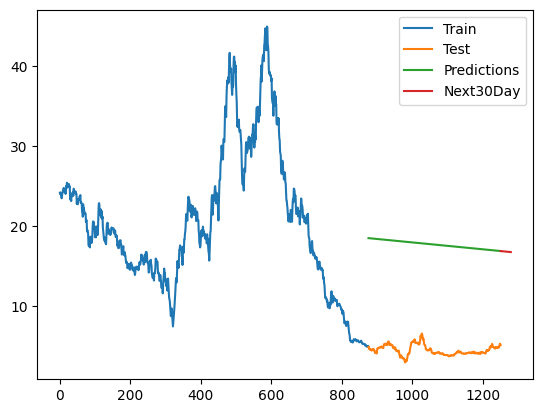

In [28]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [36]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[16.8425177  16.83821208 16.83390647 16.82960085 16.82529524 16.82098962
 16.81668401 16.8123784  16.80807278 16.80376717 16.79946155 16.79515594
 16.79085032 16.78654471 16.7822391  16.77793348 16.77362787 16.76932225
 16.76501664 16.76071102 16.75640541 16.75209979 16.74779418 16.74348857
 16.73918295 16.73487734 16.73057172 16.72626611 16.72196049 16.71765488
 16.71334926 16.70904365 16.70473804 16.70043242 16.69612681 16.69182119
 16.68751558 16.68320996 16.67890435 16.67459873 16.67029312 16.66598751
 16.66168189 16.65737628 16.65307066 16.64876505 16.64445943 16.64015382
 16.6358482  16.63154259 16.62723698 16.62293136 16.61862575 16.61432013
 16.61001452 16.6057089  16.60140329 16.59709768 16.59279206 16.58848645]


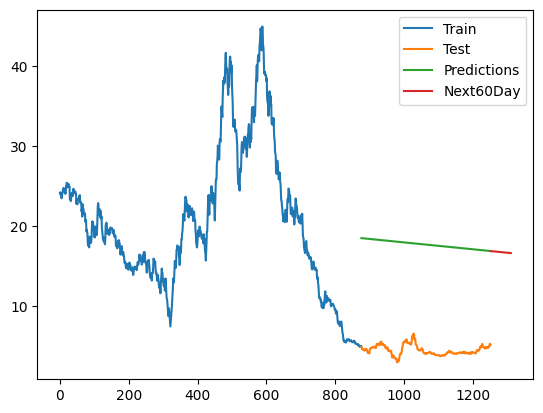

In [31]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [32]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[16.8425177  16.83821208 16.83390647 16.82960085 16.82529524 16.82098962
 16.81668401 16.8123784  16.80807278 16.80376717 16.79946155 16.79515594
 16.79085032 16.78654471 16.7822391  16.77793348 16.77362787 16.76932225
 16.76501664 16.76071102 16.75640541 16.75209979 16.74779418 16.74348857
 16.73918295 16.73487734 16.73057172 16.72626611 16.72196049 16.71765488
 16.71334926 16.70904365 16.70473804 16.70043242 16.69612681 16.69182119
 16.68751558 16.68320996 16.67890435 16.67459873 16.67029312 16.66598751
 16.66168189 16.65737628 16.65307066 16.64876505 16.64445943 16.64015382
 16.6358482  16.63154259 16.62723698 16.62293136 16.61862575 16.61432013
 16.61001452 16.6057089  16.60140329 16.59709768 16.59279206 16.58848645
 16.58418083 16.57987522 16.5755696  16.57126399 16.56695837 16.56265276
 16.55834715 16.55404153 16.54973592 16.5454303  16.54112469 16.53681907
 16.53251346 16.52820784 16.52390223 16.51959662 16.515291   16.51098539
 16.

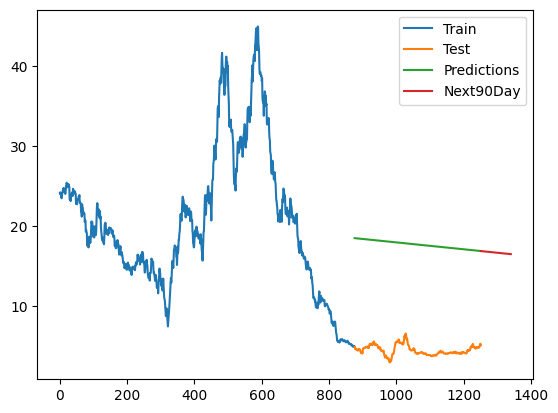

In [35]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()